In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage
import skimage.io
from skimage import io
import skimage.morphology
#These are librareis you need to have and install in your Python/Lib

In [126]:
#written by Hamid Soleimaninejad  
# Here is of Anisotropy function
#in here we just introduce parallel  and  perpendicular path
#be careful: path is case sensitive 
#for anisotropy we have two images from same point with different polarizations 
def my_pipeline(parallel_path,perpendicular_path):
    
    #we read our images from directory in here
    parallel = skimage.io.imread(parallel_path)
    perpendicular = skimage.io.imread(perpendicular_path)
    
    #then we introduce mask using threshold to remove background noise, my noise level is about 15 in ch1 and 10 in ch2. You have to measure this before
    mask_parallel = parallel > 15
    mask_perpendicular = perpendicular > 10
    
    #just plot masks   
    plt.subplots(figsize=(10,10))
    plt.title('Mask Parallel')
    plt.imshow(mask_parallel)
    plt.show()
    
    #just plot masks 
    plt.subplots(figsize=(10,10))
    plt.title('Mask Perpendicular')
    plt.imshow(mask_perpendicular)
    plt.show()
    
    #we are multiplying mask to our original data to remove Nosie entirely 
    background_removed_parallel=mask_parallel*parallel
    background_removed_perpendicular=mask_perpendicular*perpendicular
  
    #just plot  images that removed their background
    plt.subplots(figsize=(10,10))
    plt.title('Backgruond Removed Parallel')
    plt.imshow(background_removed_parallel)
    plt.show()
    
    plt.subplots(figsize=(10,10))
    plt.title('Background Removed Perpendicular')
    plt.imshow(background_removed_perpendicular)
    plt.show()
    
    #Here is G factor, You have to calculate this carefully. It is not easy to calculate! 
    g=0.75
    
    #We have calculated Anisotropy equation numerator as an image
    Anisotropy_numerator=(background_removed_parallel)-g*(background_removed_perpendicular)
    
    #plot it
    plt.subplots(figsize=(10,10))
    plt.title('Anisotropy Numerator')
    plt.imshow(Anisotropy_numerator)
    plt.show()
    
    #We have calculated Anisotropy equation denaminator as an image
    Anisotropy_denaminator=(background_removed_parallel)+2*g*(background_removed_perpendicular)
    
    #plot it
    plt.subplots(figsize=(10,10))
    plt.title('Anisotropy Denaminator')
    plt.imshow(Anisotropy_denaminator)
    plt.show()
      
    #We have calculated Anisotropy equation as an image    
    Anisotorpy= (Anisotropy_numerator)/(Anisotropy_denaminator)
    
    #plot it
    plt.subplots(figsize=(10,10))
    plt.title('ANISOTROPY')
    plt.imshow(Anisotorpy)
    plt.show()
    
    #This saves Anisotpry image of specific directory that you will show
    A1=np.array([Anisotorpy])
    skimage.io.imsave('your save path', A1)   
    
    #This part will show histogram of anisotropy
    plt.hist(np.ravel(Anisotorpy), bins = np.arange(-0.1,1,0.01))
    plt.title('ANISOTROPY HISTOGRAM')
    plt.show()
    
    #Have Fun
     

C:\Users\soleimaninej\conda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
C:\Users\soleimaninej\conda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


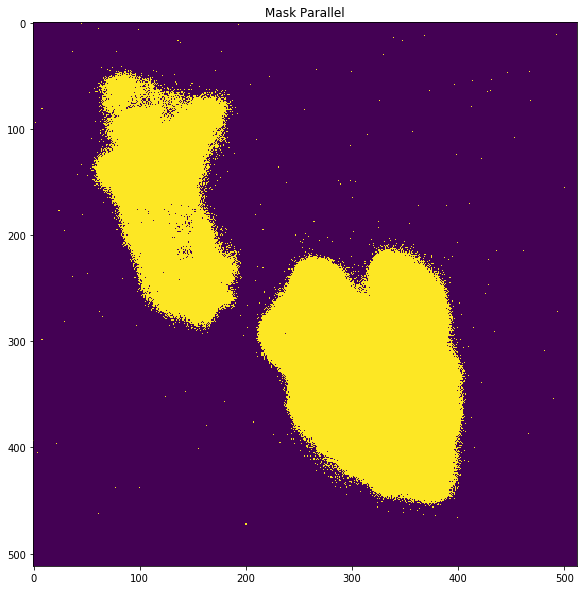

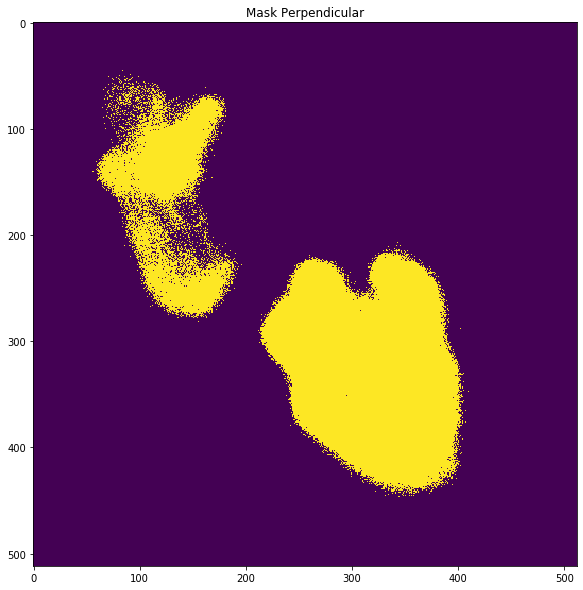

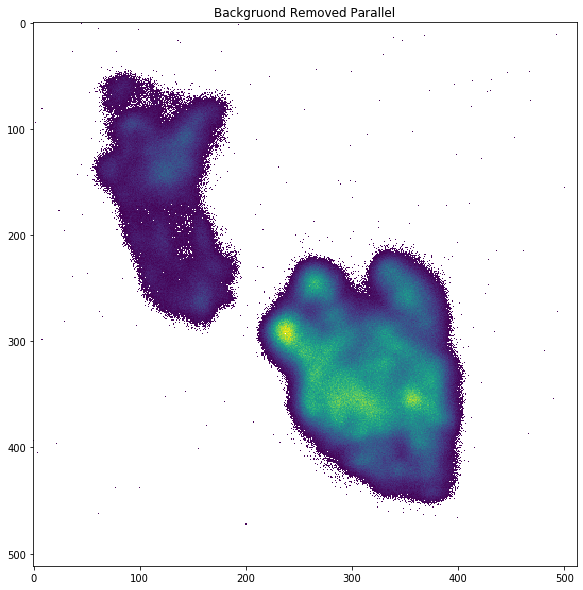

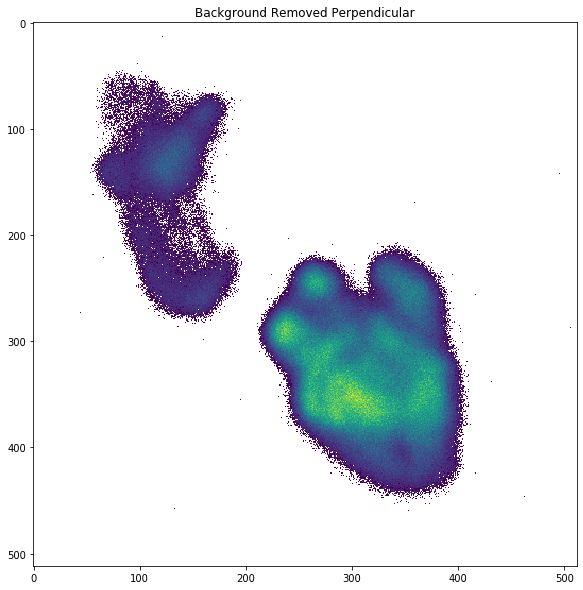

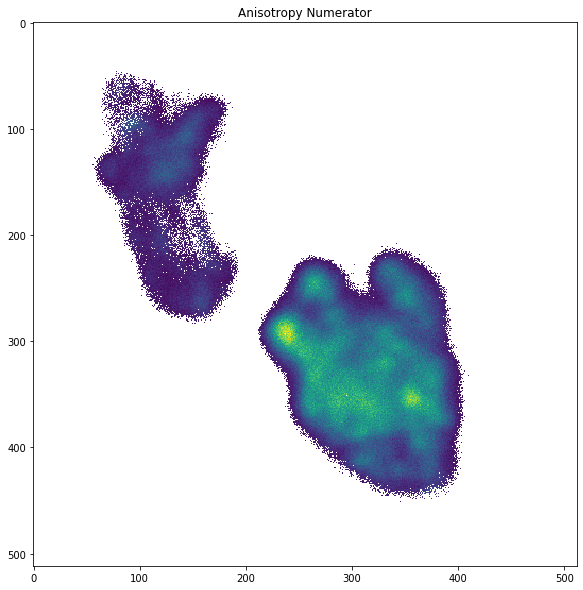

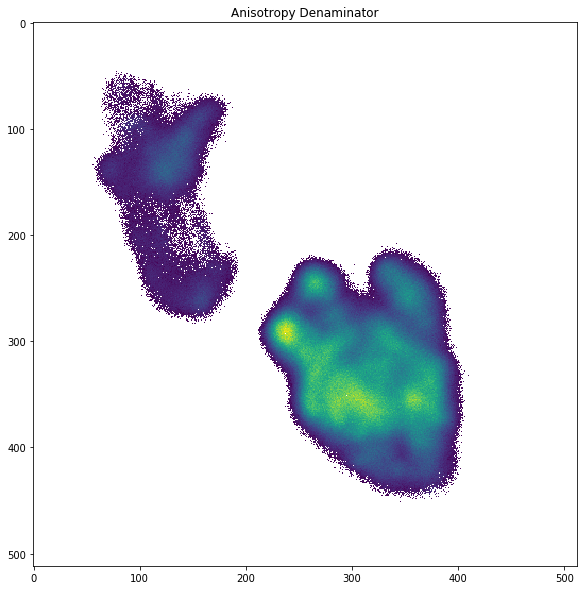

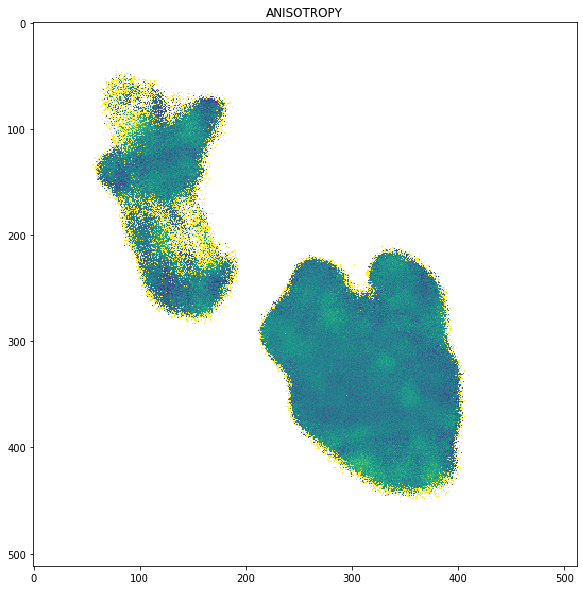

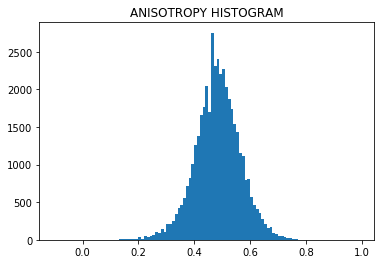

In [128]:
#Here you just assign where are your Ch1 and Ch2 images interms of directory 
my_pipeline('parallel_path','perpendicular_path')